In [1]:
# import dependencies

import numpy as np 
import cv2

In [ ]:
# upload image file

from google.colab import files
files.upload()

In [3]:
# read image file

img = cv2.imread('/content/org_image.png')

In [4]:
# check the shape

img.shape

(599, 458, 3)

In [5]:
# reshape the image

img2 = img.reshape((-1,3))

In [6]:
img2.shape

(274342, 3)

## k-means clustering

In [7]:
# documentation link : https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html
# change the data type

X = np.float32(img2)

In [8]:
# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# number of clusters (k)
k = 6

# apply kmeans()
ret,label,center = cv2.kmeans(X,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # attempts = 10 

In [9]:
# convert back into uint8, and make original image

center = np.uint8(center)
reconstracted_img = center[label.flatten()]
reconstracted_img_2 = reconstracted_img.reshape((img.shape))

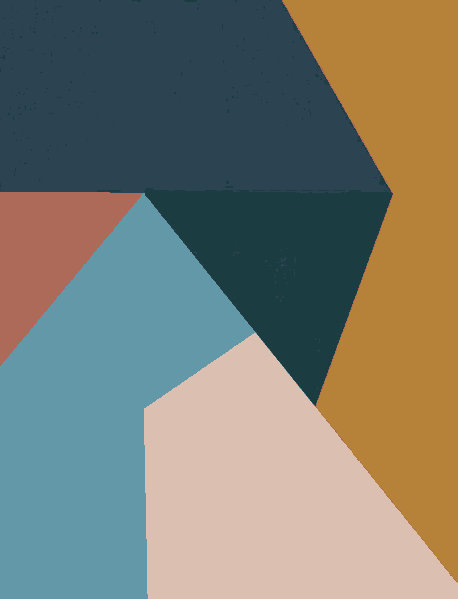

In [10]:
from google.colab.patches import cv2_imshow

cv2_imshow(reconstracted_img_2)

In [11]:
cv2.imwrite("segmented_k_mean.jpg", reconstracted_img_2)

True

In [12]:
print(center)

[[ 88 106 173]
 [ 64  60  27]
 [178 192 219]
 [ 82  67  44]
 [168 152  98]
 [ 56 129 182]]


## Gaussian Mixture Model (GMM)

In [13]:
# import dependencies

from sklearn.mixture import GaussianMixture as GMM

In [14]:
# define an instance and fit the model

gmm_model = GMM(n_components = 6, covariance_type = 'tied').fit(img2)

In [15]:
# make prediction

prediction = gmm_model.predict(img2)

In [16]:
prediction[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# reconstract the image
prediction_ = prediction*12  # to make the image visible
reconstracted_img_gmm = prediction_.reshape(img.shape[0], img.shape[1])

In [18]:
# save new file
cv2.imwrite("segmented_k_gmm.jpg", reconstracted_img_gmm)

True

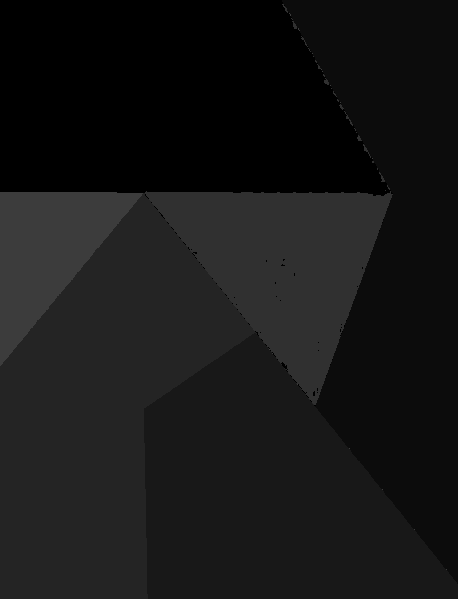

In [19]:
from google.colab.patches import cv2_imshow

cv2_imshow(reconstracted_img_gmm)

## Pick optimal number with BIC/AIC

In [20]:
# calculate BIC for GMM model

n = 2
gmm_model = GMM(n, covariance_type='tied').fit(img2)

bic_values = gmm_model.bic(img2)
print(bic_values)

7223393.509782241


In [21]:
# iterate value of n from 1 to 15

n_components = np.arange(1,15)

gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]

Text(0, 0.5, 'BIC_values')

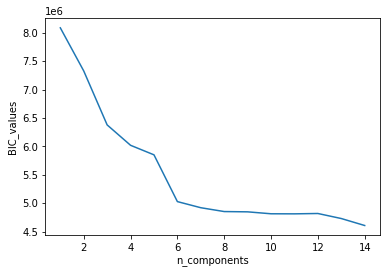

In [22]:
# plot BIC value for every value of n

from matplotlib import pyplot as plt
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')
plt.xlabel('n_components')
plt.ylabel('BIC_values')

after n=6 the graph is almost asymptotic. so n= 6 is the correct value.

Text(0, 0.5, 'AIC_values')

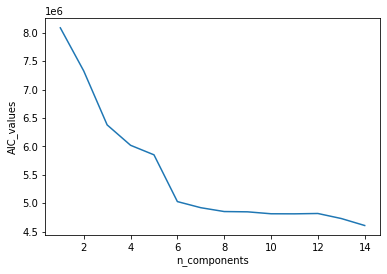

In [23]:
# plot AIC

plt.plot(n_components, [m.aic(img2) for m in gmm_models], label='AIC')
plt.xlabel('n_components')
plt.ylabel('AIC_values')